0.013461107572701797
8.238556399654129e-05
0.012135510909564334


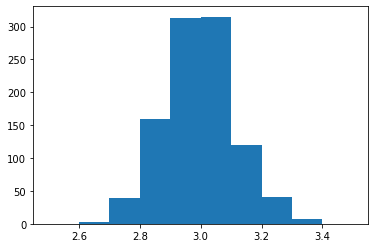

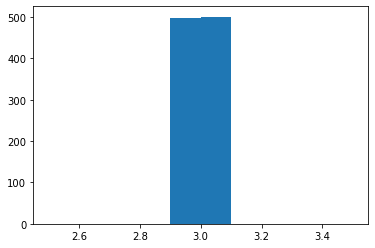

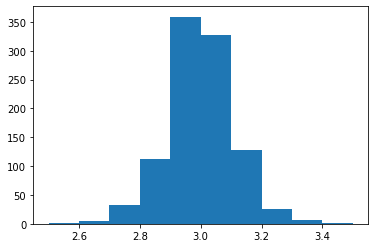

In [55]:
#Q1(f)
import random
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statistics 

n = 100
x = np.random.rand(n)
s = x**2

coef_ols=[]
coef_wls=[]
coef_est_wls=[]
# var_ols=[]
# var_wls=[]
# var_est_wls=[]
for i in range(1000):
    y = 3 * x + np.random.normal(0, s, n)
#OLS
    ols = LinearRegression(fit_intercept=False).fit(x.reshape(-1, 1), y)
    coef_ols.append(ols.coef_[0])
#     sigma2=sum(y-ols.predict(x.reshape(-1, 1)))**2/(n-1)
#     var_ols.append(sigma2/sum((x-np.mean(x))**2))
#WLS
    wls= LinearRegression(fit_intercept=False).fit(x.reshape(-1, 1), y, 1/(s**2))
    coef_wls.append(wls.coef_[0])
#     sigma2=sum(y-wls.predict(x.reshape(-1, 1)))**2/(n-1)
#     var_wls.append(sigma2/sum((x-np.mean(x))**2))
#WLS based on estimating the variances
    res_abs=abs(y-ols.predict(x.reshape(-1, 1)))
    reg=LinearRegression().fit(x.reshape(-1, 1), res_abs)
    wt=1/(reg.predict(x.reshape(-1,1))**2)
    wls_est=LinearRegression(fit_intercept=False).fit(x.reshape(-1, 1), y, wt)
    coef_est_wls.append(wls_est.coef_[0])
#     sigma2=sum(y-wls_est.predict(x.reshape(-1, 1)))**2/(n-1)
#     var_est_wls.append(sigma2/sum((x-np.mean(x))**2))
    
print(statistics.variance(coef_ols))
print(statistics.variance(coef_wls))
print(statistics.variance(coef_est_wls))

plt.hist(coef_ols,range=(2.5,3.5))
plt.show()
plt.hist(coef_wls,range=(2.5,3.5))
plt.show()
plt.hist(coef_est_wls,range=(2.5,3.5))
plt.show()



In [56]:
#Q5
#a
x = np.random.normal(0,1,100)
noise=np.random.normal(0,1,100)
#b
y=1*x+2*x**2+3*x**3+noise

print(x)
print(noise)
print(y)

[ 1.0849222   2.39034649 -1.03676428  0.29795055 -1.64895237  1.47316519
 -1.40479542 -0.55040765 -0.65391248 -0.44826386 -1.19461202 -0.25001077
  1.07085823  2.68336216 -1.23866154 -0.59974643 -2.52326215  1.79896418
 -0.35671252 -1.19353763  0.14856969  1.86148741 -0.50992085  0.91074513
 -0.6685368   1.09557956  0.7400765   0.63653716 -0.9116207  -0.38984565
  1.10677114 -1.00517189  0.00892323  0.12249353  0.66974396  1.0339612
  0.23029221  0.12952965  0.02918734 -1.69268976 -0.9756287  -0.68035532
  1.34814576  0.41338157  0.13626804 -0.63812117  1.69047544 -1.05092259
 -0.25077746 -2.08523463  1.42456424 -0.33024607  0.01742496  0.76835691
 -2.20086437  0.19937511 -0.48361831  0.30693793  0.28153318  0.89592207
 -0.91219196 -2.82207139 -0.94374288 -1.46936483  0.92572993 -0.8161504
  0.52482723 -0.2569188   0.60744928 -0.25995724  0.1096801  -1.25778314
  0.12490607  1.06745712 -0.60162975  0.48543153  0.62052712 -1.27992865
  2.14067562  0.75274598 -0.37308945  0.36531882  0.6

In [57]:
#c
import pandas as pd
import itertools 
from sklearn.metrics import mean_squared_error

def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k =LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared
from tqdm import tnrange, tqdm_notebook

#Initialization variables
Y = y
X = np.empty([100,10], dtype = float)
for i in range(10):
    X[:,i]=x**(i+1)
X=pd.DataFrame(X)
k = 10
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

m = len(Y)
p = 10
hat_sigma_squared = (1/(m - p -1)) * min(df['RSS'])

#Computing
df['C_p'] = (1/m) * (df['RSS'] + 2 * df['numb_features'] * hat_sigma_squared )
df['AIC'] = (1/(m*hat_sigma_squared)) * (df['RSS'] + 2 * df['numb_features'] * hat_sigma_squared )
df['BIC'] = (1/(m*hat_sigma_squared)) * (df['RSS'] +  np.log(m) * df['numb_features'] * hat_sigma_squared )
df['R_squared_adj'] = 1 - ( (1 - df['R_squared'])*(m-1)/(m-df['numb_features'] -1))
df

<ipython-input-57-dd9395575402>:26: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):


Loop...:   0%|          | 0/10 [00:00<?, ?it/s]

,numb_features,RSS,R_squared,features,C_p,AIC,BIC,R_squared_adj
0,1,6503.185360,0.657726,"(0,)",65.051442,66.419774,66.445825,0.654234
1,1,18776.482686,0.011762,"(1,)",187.784415,191.734388,191.760439,0.001678
2,1,1035.405680,0.945505,"(2,)",10.373645,10.591850,10.617902,0.944949
3,1,18961.842271,0.002006,"(3,)",189.638011,193.626973,193.653025,-0.008177
4,1,3072.263200,0.838302,"(4,)",30.742220,31.388871,31.414922,0.836652
...,...,...,...,...,...,...,...,...
1018,9,87.693760,0.995385,"(0, 1, 2, 4, 5, 6, 7, 8, 9)",1.053229,1.075384,1.309849,0.994923
1019,9,98.056232,0.994839,"(0, 1, 3, 4, 5, 6, 7, 8, 9)",1.156854,1.181188,1.415653,0.994323
1020,9,87.874375,0.995375,"(0, 2, 3, 4, 5, 6, 7, 8, 9)",1.055036,1.077228,1.311693,0.994913
1021,9,89.658291,0.995281,"(1, 2, 3, 4, 5, 6, 7, 8, 9)",1.072875,1.095442,1.329908,0.994809


In [58]:
df.iloc[df['R_squared_adj'].idxmax(),:]

numb_features                     6
RSS                       87.786751
R_squared                   0.99538
features         (0, 1, 2, 3, 5, 7)
C_p                        0.995395
AIC                        1.016333
BIC                        1.172643
R_squared_adj              0.995082
Name: 643, dtype: object

In [59]:
df.iloc[df['AIC'].idxmin(),:]

numb_features            3
RSS              91.077516
R_squared         0.995206
features         (0, 1, 2)
C_p               0.969539
AIC               0.989933
BIC               1.068088
R_squared_adj     0.995057
Name: 55, dtype: object

In [60]:
df.iloc[df['BIC'].idxmin(),:]

numb_features            3
RSS              91.077516
R_squared         0.995206
features         (0, 1, 2)
C_p               0.969539
AIC               0.989933
BIC               1.068088
R_squared_adj     0.995057
Name: 55, dtype: object

In [61]:
df.iloc[df['C_p'].idxmin(),:]

numb_features            3
RSS              91.077516
R_squared         0.995206
features         (0, 1, 2)
C_p               0.969539
AIC               0.989933
BIC               1.068088
R_squared_adj     0.995057
Name: 55, dtype: object

In [62]:
x_selected= np.empty([100,3], dtype = float)
for i in range(3):
    x_selected[:,i]=x**(i+1)
ols = LinearRegression(fit_intercept=True).fit(x_selected, y)
print(ols.coef_)
print(ols.intercept_)


[0.72199006 1.94297979 3.05012197]
0.1837389131982743


In [63]:
# #d
# k = 10
# remaining_features = list(X)
# features = []
# RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
# features_list = dict()

# for i in range(1,k+1):
#     best_RSS = np.inf
    
#     for combo in itertools.combinations(remaining_features,1):

#             RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

#             if RSS[0] < best_RSS:
#                 best_RSS = RSS[0]
#                 best_R_squared = RSS[1] 
#                 best_feature = combo[0]

#     #Updating variables for next loop
#     features.append(best_feature)
#     remaining_features.remove(best_feature)
    
#     #Saving values for plotting
#     RSS_list.append(best_RSS)
#     R_squared_list.append(best_R_squared)
#     features_list[i] = features.copy()

In [64]:
# variables = ['C_p', 'AIC','BIC','R_squared_adj']
# fig = plt.figure(figsize = (18,6))

# for i,v in enumerate(variables):
#     ax = fig.add_subplot(1, 4, i+1)
#     ax.plot(df['numb_features'],df[v], color = 'lightblue')
#     ax.scatter(df['numb_features'],df[v], color = 'darkblue')
#     if v == 'R_squared_adj':
#         ax.plot(df[v].idxmax(),df[v].max(), marker = 'x', markersize = 20)
#     else:
#         ax.plot(df[v].idxmin(),df[v].min(), marker = 'x', markersize = 20)
#     ax.set_xlabel('Number of predictors')
#     ax.set_ylabel(v)

# fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
# plt.show()

In [65]:
#d
import statsmodels.api as sm
#forward stepwise
#Step1
for i in range(10):
    x=X.iloc[:,i].values
    x= sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     188.3
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           1.51e-24
Time:                        20:19:13   Log-Likelihood:                -350.64
No. Observations:                 100   AIC:                             705.3
Df Residuals:                      98   BIC:                             710.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1577      0.815      2.648      0.0

In [66]:
#step2
x3=X.iloc[:,2]
for i in range(10):
    x= np.column_stack((x3,X.iloc[:,i].values))
    x= sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     878.1
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           7.32e-63
Time:                        20:19:13   Log-Likelihood:                -256.75
No. Observations:                 100   AIC:                             519.5
Df Residuals:                      97   BIC:                             527.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3027      0.320      7.189      0.0

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     2699.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           9.39e-86
Time:                        20:19:13   Log-Likelihood:                -202.41
No. Observations:                 100   AIC:                             410.8
Df Residuals:                      97   BIC:                             418.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [67]:
#step3
x3=X.iloc[:,2]
x2=X.iloc[:,1]
for i in range(10):
    x= np.column_stack((x3,x2,X.iloc[:,i].values))
    x= sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     6644.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          3.69e-111
Time:                        20:19:13   Log-Likelihood:                -137.22
No. Observations:                 100   AIC:                             282.4
Df Residuals:                      96   BIC:                             292.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1837      0.119      1.541      0.1

In [68]:
#step4
x3=X.iloc[:,2]
x2=X.iloc[:,1]
x1=X.iloc[:,0]
for i in range(10):
    x= np.column_stack((x3,x2,x1,X.iloc[:,i].values))
    x= sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     6644.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          3.69e-111
Time:                        20:19:13   Log-Likelihood:                -137.22
No. Observations:                 100   AIC:                             282.4
Df Residuals:                      96   BIC:                             292.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1837      0.119      1.541      0.1

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4931.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          3.26e-109
Time:                        20:19:13   Log-Likelihood:                -137.22
No. Observations:                 100   AIC:                             284.4
Df Residuals:                      95   BIC:                             297.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4931.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          3.27e-109
Time:                        20:19:13   Log-Likelihood:                -137.22
No. Observations:                 100   AIC:                             284.4
Df Residuals:                      95   BIC:                             297.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [69]:
#backward
#step1
x= sm.add_constant(X)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1931.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           1.74e-99
Time:                        20:19:13   Log-Likelihood:                -135.03
No. Observations:                 100   AIC:                             292.1
Df Residuals:                      89   BIC:                             320.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4123      0.198      2.080      0.0

In [70]:
#step2
x=X.drop(columns=4)
x= sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2170.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          3.63e-101
Time:                        20:19:14   Log-Likelihood:                -135.03
No. Observations:                 100   AIC:                             290.1
Df Residuals:                      90   BIC:                             316.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4127      0.196      2.105      0.0

In [71]:
X

,0,1,2,3,4,5,6,7,8,9
0,1.084922,1.177056,1.277014,1.385461,1.503118,1.630766,1.769254,1.919503,2.082511,2.259363
1,2.390346,5.713756,13.657857,32.647012,78.037670,186.537070,445.888230,1065.827365,2547.696701,6089.877868
2,-1.036764,1.074880,-1.114397,1.155367,-1.197844,1.241882,-1.287538,1.334874,-1.383949,1.434829
3,0.297951,0.088775,0.026450,0.007881,0.002348,0.000700,0.000208,0.000062,0.000019,0.000006
4,-1.648952,2.719044,-4.483574,7.393200,-12.191034,20.102435,-33.147958,54.659404,-90.130754,148.621320
...,...,...,...,...,...,...,...,...,...,...
95,1.295046,1.677144,2.171979,2.812814,3.642723,4.717495,6.109373,7.911920,10.246301,13.269433
96,-0.698481,0.487875,-0.340771,0.238022,-0.166254,0.116125,-0.081111,0.056655,-0.039572,0.027640
97,-1.449800,2.101921,-3.047366,4.418072,-6.405323,9.286439,-13.463482,19.519361,-28.299177,41.028157
98,0.984431,0.969104,0.954016,0.939163,0.924541,0.910146,0.895976,0.882026,0.868294,0.854775


In [72]:
#step3
x=X.drop(columns=[4,8])
x= sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2468.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          7.12e-103
Time:                        20:19:14   Log-Likelihood:                -135.04
No. Observations:                 100   AIC:                             288.1
Df Residuals:                      91   BIC:                             311.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4156      0.194      2.144      0.0

In [73]:
#step4
x=X.drop(columns=[4,8,9])
x= sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2851.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          1.29e-104
Time:                        20:19:14   Log-Likelihood:                -135.04
No. Observations:                 100   AIC:                             286.1
Df Residuals:                      92   BIC:                             306.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4124      0.178      2.322      0.0

In [74]:
#step5
x=X.drop(columns=[3,4,8,9])
x= sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3232.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          1.33e-105
Time:                        20:19:14   Log-Likelihood:                -137.01
No. Observations:                 100   AIC:                             288.0
Df Residuals:                      93   BIC:                             306.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2219      0.150      1.483      0.1

In [75]:
#step6
x=X.drop(columns=[3,4,6,8,9])
x= sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3918.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          2.05e-107
Time:                        20:19:14   Log-Likelihood:                -137.03
No. Observations:                 100   AIC:                             286.1
Df Residuals:                      94   BIC:                             301.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2242      0.148      1.511      0.1

In [76]:
#step6
x=X.drop(columns=[3,4,6,7,8,9])
x= sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4949.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          2.74e-109
Time:                        20:19:14   Log-Likelihood:                -137.03
No. Observations:                 100   AIC:                             284.1
Df Residuals:                      95   BIC:                             297.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2210      0.135      1.639      0.1

In [77]:
#e
import pandas as pd
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

Lambdas = np.logspace(-5, 2, 200)
# LASSO回归模型的交叉验证
lasso_cv = LassoCV(alphas=Lambdas, normalize=True, cv=5, max_iter=100000)
lasso_cv.fit(X, y)
# 输出最佳的lambda值
lasso_best_alpha = lasso_cv.alpha_
print(lasso_best_alpha)

0.0015167168884709225


In [79]:
print(lasso_cv.coef_)

[0.7405285  1.82004534 3.02426699 0.01916654 0.00339618 0.
 0.         0.         0.         0.        ]


In [80]:
#f
x = np.random.normal(0,1,100)
noise=np.random.normal(0,1,100)
y=7*x**7+noise

#Initialization variables
Y = y
k = 10
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 10 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

m = len(Y)
p = 10
hat_sigma_squared = (1/(m - p -1)) * min(df['RSS'])

#Computing
df['C_p'] = (1/m) * (df['RSS'] + 2 * df['numb_features'] * hat_sigma_squared )
df['AIC'] = (1/(m*hat_sigma_squared)) * (df['RSS'] + 2 * df['numb_features'] * hat_sigma_squared )
df['BIC'] = (1/(m*hat_sigma_squared)) * (df['RSS'] +  np.log(m) * df['numb_features'] * hat_sigma_squared )
df['R_squared_adj'] = 1 - ( (1 - df['R_squared'])*(m-1)/(m-df['numb_features'] -1))

<ipython-input-80-26729b9d794b>:13: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):


Loop...:   0%|          | 0/10 [00:00<?, ?it/s]

In [81]:
df.iloc[df['R_squared_adj'].idxmax(),:]

numb_features                  2
RSS              46940265.074487
R_squared               0.026683
features                  (1, 3)
C_p                490114.068744
AIC                     0.946558
BIC                     0.998662
R_squared_adj           0.006614
Name: 20, dtype: object

In [82]:
df.iloc[df['AIC'].idxmin(),:]

numb_features                  1
RSS              47486989.120275
R_squared               0.015346
features                    (1,)
C_p                485225.600202
AIC                     0.937117
BIC                     0.963169
R_squared_adj           0.005299
Name: 1, dtype: object

In [83]:
df.iloc[df['BIC'].idxmin(),:]

numb_features                  1
RSS              47486989.120275
R_squared               0.015346
features                    (1,)
C_p                485225.600202
AIC                     0.937117
BIC                     0.963169
R_squared_adj           0.005299
Name: 1, dtype: object

In [84]:
df.iloc[df['C_p'].idxmin(),:]

numb_features                  1
RSS              47486989.120275
R_squared               0.015346
features                    (1,)
C_p                485225.600202
AIC                     0.937117
BIC                     0.963169
R_squared_adj           0.005299
Name: 1, dtype: object

In [85]:
Lambdas = np.logspace(-5, 2, 200)
# LASSO回归模型的交叉验证
lasso_cv = LassoCV(alphas=Lambdas, normalize=True, cv=5, max_iter=100000)
lasso_cv.fit(X, y)
# 输出最佳的lambda值
lasso_best_alpha = lasso_cv.alpha_
print(lasso_best_alpha)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25648.452886022627, tolerance: 4767.648466322154
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127108.19390127063, tolerance: 4767.648466322154
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264240.3707092181, tolerance: 4767.648466322154
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17023363.12002422, tolerance: 4767.648466322154
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17262966.415403526, tolerance: 4767.648466322154
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17485771.492613144, tolerance: 4767.648466322154
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20543801.626054432, tolerance: 4767.648466322154
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20593787.347572397, tolerance: 4767.648466322154
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20641988.636644263, tolerance: 4767.648466322154
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 797886.6089414805, tolerance: 4576.745527338675
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 802358.0570143312, tolerance: 4576.745527338675
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 805105.3818263039, tolerance: 4576.745527338675
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 803288.9387604892, tolerance: 4576.745527338675
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 803172.611185737, tolerance: 4576.745527338675
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 803070.6255865246, tolerance: 4576.745527338675
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Con

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 802002.3161857575, tolerance: 4576.745527338675
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 801999.840049237, tolerance: 4576.745527338675
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 801941.4323322475, tolerance: 4576.745527338675
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Con

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 496285.45022231713, tolerance: 3687.1282195432264
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 789331.9606189914, tolerance: 3687.1282195432264
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1058395.6117729135, tolerance: 3687.1282195432264
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2566876.8978428394, tolerance: 3687.1282195432264
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2568999.178758431, tolerance: 3687.1282195432264
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2570768.996532157, tolerance: 3687.1282195432264
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2579390.69280421, tolerance: 3687.1282195432264
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2579382.2559837587, tolerance: 3687.1282195432264
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2579399.945548035, tolerance: 3687.1282195432264
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1172476.6882398576, tolerance: 4679.156749787979
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1176542.042703472, tolerance: 4679.156749787979
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1179615.007255286, tolerance: 4679.156749787979
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1188084.4503567815, tolerance: 4679.156749787979
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1188056.3218755126, tolerance: 4679.156749787979
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1188042.570280239, tolerance: 4679.156749787979
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109014.50834431313, tolerance: 1521.2225731167418
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121671.72702552378, tolerance: 1521.2225731167418
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130029.60982571729, tolerance: 1521.2225731167418
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143666.30197660998, tolerance: 1521.2225731167418
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143638.5164456144, tolerance: 1521.2225731167418
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143612.70437781513, tolerance: 1521.2225731167418
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

6.3682499447185865


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143341.03287820704, tolerance: 1521.2225731167418
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143335.22564873286, tolerance: 1521.2225731167418
  model = cd_fast.enet_coordinate_descent_gram(


In [87]:
print(lasso_cv.coef_)

[ -0.         -14.32223121  -0.          -0.          -0.
  -0.           0.          -0.           0.          -0.        ]
